In [1]:
from selenium import webdriver
import time
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager , rc
import platform

fn_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=fn_name)


In [2]:
driver = webdriver.Chrome("./chromedriver.exe")

prices = []
date = []

# 우선 10 페이지만 테스트
for page in range(1,11):
    url = "https://finance.naver.com/item/sise_day.nhn?code=035720" + "&page=" + str(page)
    driver.get(url)
    date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
    price_sel= driver.find_elements_by_css_selector("span.tah.p11")
    for d in date_sel:
        date.append(d.text)
	# 가격은 매매종가 기준
    for i,p in enumerate(price_sel):
        if i% 6 == 0:
            prices.append(p.text)
            
df = pd.DataFrame({"price (종가)" : prices})
df.index = date
df

,price (종가)
2021.02.02,"445,500"
2021.02.01,"441,500"
2021.01.29,"441,000"
2021.01.28,"458,000"
2021.01.27,"465,000"
...,...
2020.09.11,"379,000"
2020.09.10,"385,500"
2020.09.09,"384,000"
2020.09.08,"390,000"


In [ ]:
plt.plot(df["price (종가)"].values)
df["price (종가)"]

In [ ]:
plt.plot(df["price (종가)"].values[0:10])

In [ ]:
prices = []
date = []

# 우선 10 페이지만 테스트
for page in range(1,11):
    url = "https://finance.naver.com/item/sise_day.nhn?code=005930" + "&page=" + str(page)
    driver.get(url)
    date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
    price_sel= driver.find_elements_by_css_selector("span.tah.p11")
    for d in date_sel:
        date.append(d.text)

    for i,p in enumerate(price_sel):
        if i%6 == 0: prices.append(int(p.text.replace(',',"")))
            
df = pd.DataFrame({"price (종가)" : prices})
df.index = date
plt.plot(df["price (종가)"].values)

In [ ]:
from matplotlib import font_manager , rc
import platform

# matplot 에서 한글 폰트 사용
if platform.system() == "Windows":
    path =  "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font' , family =  font_name)

# 좀 더 그럴듯하게 그려보기
plt.figure(figsize=(12,4))
plt.plot(df["price (종가)"] , label = "Price")
plt.title("주식 가격 그래프")
plt.xlabel("기준 년월")
plt.ylabel("주식 가격 (종가 기준)")
plt.legend()
plt.show()

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(df["price (종가)"] , label = "Price")
plt.title("주식 가격 그래프")
plt.xlabel("기준 년월")
plt.ylabel("주식 가격 (종가 기준)")
plt.legend()

# X 축에서 눈금이 len_xticks 개수만큼만 보이도록 설정
xticks = []
len_xticks = 10
for i in range(len(df)):
    num_divide = int(len(df)/len_xticks)
    if i%num_divide == 0:
        xticks.append(df.index[i])
xticks.append(df.index[-1])
plt.xticks(xticks)
plt.show()

In [ ]:
code_number = "005930"
page = 0
prices = []
date = []

pv_date = ""
while(1):
    page += 1
    url = "https://finance.naver.com/item/sise_day.nhn?code=" + code_number + "&page=" + str(page)
    driver.get(url)
    date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
    price_sel= driver.find_elements_by_css_selector("span.tah.p11")
    
    now_date = date_sel[0].text
    if pv_date == now_date: break
    else:
        pv_date = now_date
    for d in date_sel:
        date.append(d.text)

    for i,p in enumerate(price_sel):
        if i% 6 == 0:
            prices.append(int(p.text.replace(",","")))
            
price.reverse()
date.reverse()
df = pd.DataFrame({"price(종가)" : prices})
df.index = date

df


In [ ]:
def get_stock_prices(code_number):

    driver = webdriver.Chrome("./chromedriver.exe")
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    driver.get(url)
    if driver.find_elements_by_css_selector("div.error_content"):
        print("잘못된 코드번호 입니다")
        return
    stock_name = driver.find_element_by_css_selector("div.wrap_company a").text
    print("코드 종목 : {} / 코드 번호 : {}".format(stock_name , code_number))

In [ ]:
get_stock_prices("000000")
get_stock_prices("293490")

In [ ]:
# 종목코드를 입력받아 전체 데이터 스크래핑
def get_stock_prices(code_number):
    
    driver = webdriver.Chrome("./chromedriver.exe")
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    driver.get(url)
    if driver.find_elements_by_css_selector("div.error_content"):
        print("잘못된 코드번호 입니다")
        return
  
    stock_name = driver.find_element_by_css_selector("div.wrap_company a").text
    print("코드 종목 : {} / 코드 번호 : {}".format(stock_name , code_number))
    
    # 스크래핑
    prices = []
    date = []
    pv_date = ""
    page = 0
    while(1):
        page += 1
        url = "https://finance.naver.com/item/sise_day.nhn?code=" + code_number + "&page=" + str(page)
        driver.get(url)
        date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
        price_sel= driver.find_elements_by_css_selector("span.tah.p11")

        now_date = date_sel[0].text
        if pv_date == now_date: break
        else:
            pv_date = now_date
        for d in date_sel:
            date.append(d.text)

        for i,p in enumerate(price_sel):
            if i% 6 == 0:
                prices.append(int(p.text.replace(",","")))

    df = pd.DataFrame({"price(종가)" : prices})
    df.index = date
    save_name = code_number + " (" + stock_name + ")" + " Price.xlsx"
    if not os.path.exists("./data"): os.makedirs("./data")
    df.to_excel("./data/" + save_name , engine="openpyxl" , index=True)
    print("Succesful Saving")   
    driver.close()
    return

In [ ]:
get_stock_prices("005930")

In [30]:
from matplotlib import font_manager, rc

# 파일 경로를 입력받아 그래프 출력/저장
def draw_graph(code_number):
    
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    html = urlopen(url)
    bs = BeautifulSoup(html , "lxml")
 
    dir_path = "./data/"
    code_name =  bs.select("div.wrap_company a")[0].text
    try:
        path = dir_path + code_number + " (" + code_name + ") Price"
        df = pd.read_excel(path + ".xlsx", engine="openpyxl" , index_col= 0)

    except:
        print("Error - 종목코드를 확인하거나 데이터가 존재하는지 확인해주세요")
        return

    # 한글 폰트 문제
    fn_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=fn_name)
        
    # 좀 더 그럴듯하게 그려보기
    plt.figure(figsize=(12,4))
    plt.plot(list(reversed(df.index)) , list(reversed(df["price(종가)"])) , label = "매매가 (종가)")
    plt.title(code_number + " (" + code_name + ") 가격 그래프")
    plt.xlabel("기준년월일")
    plt.ylabel("가격 (종가 기준)")
    xticks = []
    len_xticks = 10
    for i in range(len(df)):
        num_divide = int(len(df)/len_xticks)
        if i%num_divide == 0:
            xticks.append(df.index[i])
    xticks.append(df.index[-1])
    plt.xticks(xticks)
    plt.legend()
    plt.savefig(path + ".png")

    print("Saving Succesuflly")
    return
    
    

Saving Succesuflly


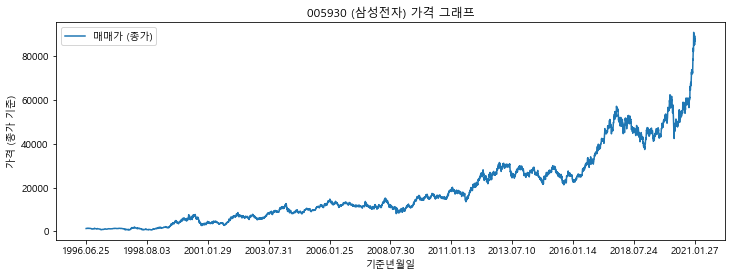

In [31]:
draw_graph("005930")

In [26]:
# 2018년 5월 3일들부터 이전의 주가들만 1/50 
def correct_value_division(code_number, division_date, division_rate):
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    html = urlopen(url)
    bs = BeautifulSoup(html , "lxml")
    dir_path = "./data/"
    code_name =  bs.select("div.wrap_company a")[0].text
  
    try:
        path = dir_path + code_number + " (" + code_name + ") Price"
        df = pd.read_excel(path + ".xlsx", engine="openpyxl" , index_col= 0)
    except:
        print("Error - 종목코드를 확인하거나 데이터가 존재하는지 확인해주세요")
        return

    df.loc[division_date:] = df.loc[division_date:]/division_rate
    
    df.to_excel(path + ".xlsx", engine="openpyxl")    
    

    


In [27]:
correct_value_division("005930" , "2018.05.03" , 50)

In [ ]:
# xlsx 파일을 열어서 업데이트 한다
def update_stock_prices(code_number):
    
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    
   
    try:
        html = urlopen(url)
        bs = BeautifulSoup(html , "lxml")
        dir_path = "./data/"
        code_name =  bs.select("div.wrap_company a")[0].text
        path = dir_path + code_number + " (" + code_name + ") Price"
        df = pd.read_excel(path + ".xlsx", engine="openpyxl" , index_col= 0)
    except:
        print("Error - 종목코드를 확인하거나 데이터가 존재하는지 확인해주세요")
        return
    
    
    latest_date = df.index[0]
    page = 0
    date = []
    prices = []
    driver = webdriver.Chrome("./chromedriver.exe")
    while(1):
        page += 1
        url = "https://finance.naver.com/item/sise_day.nhn?code=" + code_number + "&page=" + str(page)
        driver.get(url)
        date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
        price_sel= driver.find_elements_by_css_selector("span.tah.p11")

        now_date = date_sel[0].text
        print(latest_date , now_date)
        if latest_date == now_date: 
            break
            
        for d in date_sel:
            date.append(d.text)

        for i,p in enumerate(price_sel):
            if i% 6 == 0:
                prices.append(int(p.text.replace(",","")))

    #     # 가장 최신 데이터까지 확인하면 탈출
    #     if date_sel[0].text == last_date: break
    print(date)
    driver.close()
    

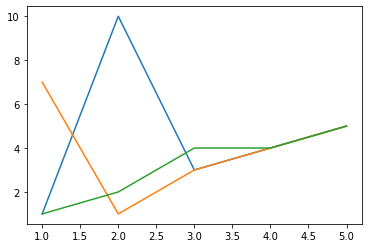

In [7]:
import pandas as pd

a = pd.DataFrame( {"val_a" : [1,10,3,4,5]} , index = [1,2,3,4,5])
b = pd.DataFrame( {"val_b" : [7,1,3,4,5]} , index = [1,2,3,4,5])
c = pd.DataFrame( {"val_c" : [1,2,4,4,5]} , index = [1,2,3,4,5])






import matplotlib.pyplot as plt

plt.plot(a.index , a["val_a"])
plt.plot(a.index , b["val_b"])
plt.plot(c.index , c["val_c"])


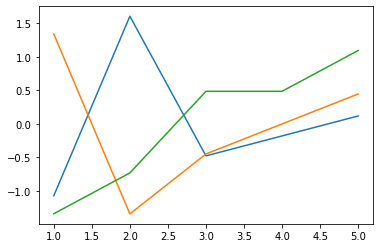

In [9]:

nor_a = (a - a.mean())/a.std()
nor_b = (b - b.mean())/b.std()
nor_c = (c - c.mean())/c.std()

plt.plot(a.index , nor_a["val_a"])
plt.plot(a.index , nor_b["val_b"])
plt.plot(c.index , nor_c["val_c"])



In [14]:


def sample(**args):
    if args.get("start"):
        print(args["start"])

sample(start = 1)


1
